In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

SAVE_PLOTS=False
STANDARD_DPI=300


In [47]:
def load_h5_data(filename):
    data = {}
    with h5py.File(filename, 'r') as f:
        for voltage in f.keys():
            data[int(voltage)] = {'CH1': [], 'CH2': []}

            for i in f[voltage]['CH1']:
                arr = np.array(f[voltage]['CH1'][i])  # Load as NumPy array
                df = pd.DataFrame(arr, columns=['t', 'V'])  # Convert to DataFrame
                data[int(voltage)]['CH1'].append(df)

            for i in f[voltage]['CH2']:
                arr = np.array(f[voltage]['CH2'][i])
                df = pd.DataFrame(arr, columns=['t', 'V'])
                data[int(voltage)]['CH2'].append(df)

    return data


In [60]:
path_to_signals = "data/gain_fixed_light/signals_20250308-173933.h5"
signals = load_h5_data(path_to_signals)
print('available keys:', list(signals.keys()))
print('maximum key:', max(signals.keys()))

available keys: [1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]
maximum key: 1890


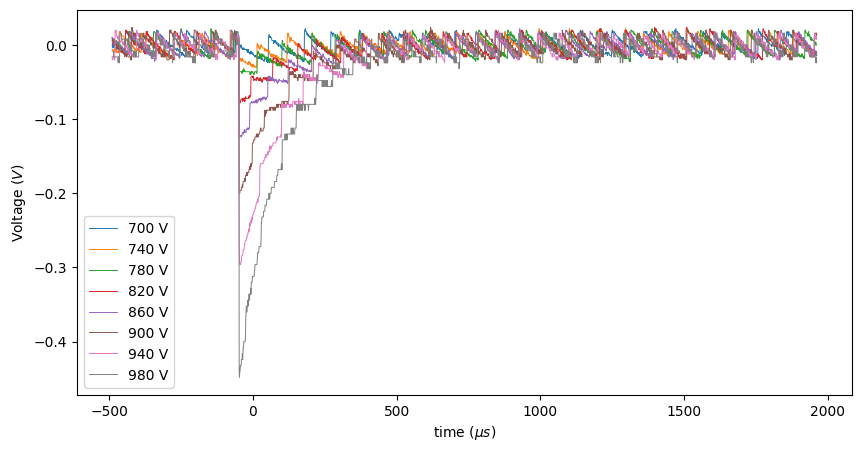

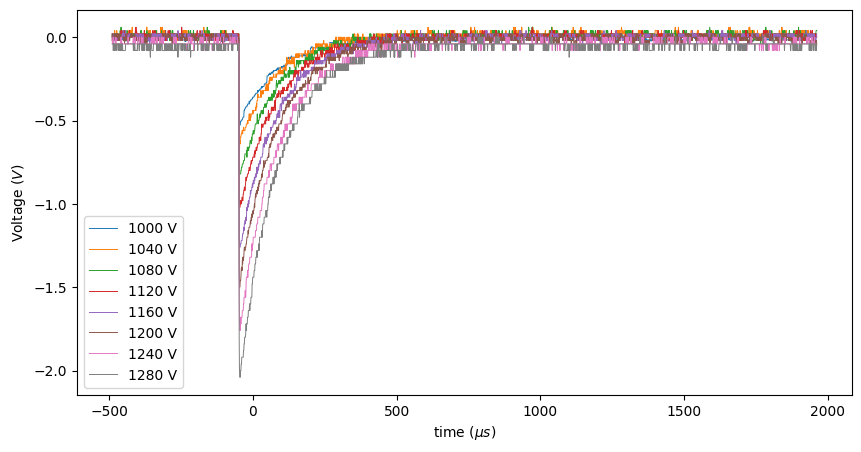

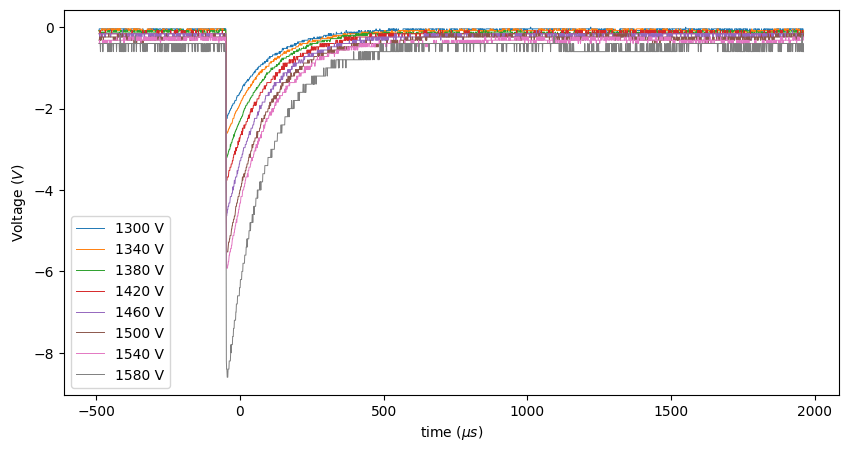

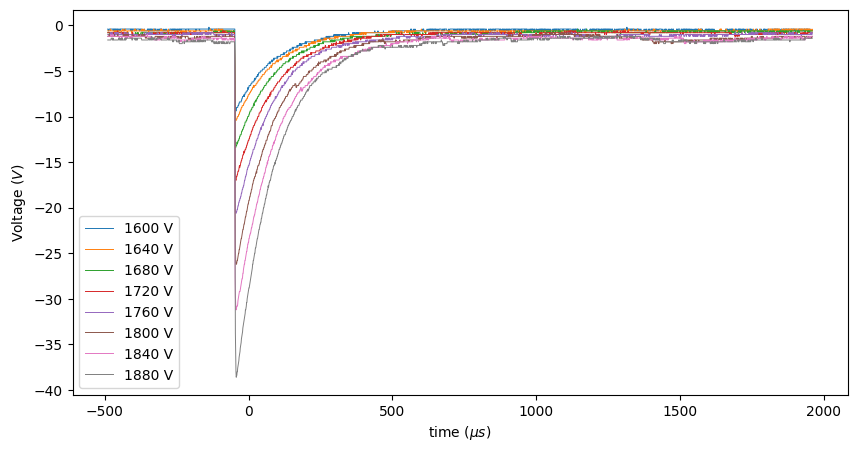

In [ ]:
def plot_waveforms(voltages, save_fig_path=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in voltages:
        sig = signals[i]['CH1'][0]
        V = sig['V']
        t = sig['t']*1e6 # in microseconds
        ax.plot(t, V, label=f'{i} V', linewidth=0.7)
        ax.set_xlabel(r'time $(\mu s)$')
        ax.set_ylabel(r'Voltage $(V)$')
        plt.legend()

signal_ids = list(signals.keys())
signal_ids = sorted(signal_ids)

def gen_savefig_path(voltages):
    savefig_dir = 'plots/pmt_signal_tests/pmt1/'
    v_min = min(voltages)
    v_max = max(voltages)
    return savefig_dir + f'pmt1_waveforms_{v_min}-{v_max}V.jpg'

def save_if_requested():
    if SAVE_PLOTS:
        plt.savefig(gen_savefig_path(voltages), dpi=STANDARD_DPI)


voltages = signal_ids[:30: 4]
plot_waveforms(voltages)
save_if_requested()
plt.show()



voltages = signal_ids[30:60: 4]
plot_waveforms(voltages)
save_if_requested()
plt.show()

voltages = signal_ids[60:90: 4]
plot_waveforms(voltages)
save_if_requested()
plt.show()

voltages = signal_ids[90:120: 4]
plot_waveforms(voltages)
save_if_requested()
plt.show()